# Plant 3 Images June 6

In [1]:
# -*- coding: utf-8 -*-
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
# Grab files
files = []
directory = ['set4.1','set4.2']
for d in directory:
    for f in os.listdir(d):
        if os.path.splitext(f)[1] == ".jpg":
            f_dir = d + '/' + f
            files.append(f_dir)

for d in directory:
    for f in os.listdir(d):
        if os.path.splitext(f)[1] == ".pgm":
            f_dir = d + '/' + f
            files.append(f_dir)

In [3]:
# Calibration of thermal images
min_temp = 10000000
max_temp = 0
therm_img = []
for f in files:
    if os.path.splitext(f)[1] == ".pgm":
        img = cv.imread(f, -1)
        img = np.float32(img)
        Fdegree_img = -0.00000608 * np.float_power(img, 2) + 0.1715806300 * img - 920.665168
        if Fdegree_img.min() < min_temp:
            min_temp = Fdegree_img.min()
        if Fdegree_img.max() > max_temp:
            max_temp = Fdegree_img.max()
        therm_img.append(Fdegree_img)
print "max temp:", max_temp
print "min temp:", min_temp

max temp: 88.05017324812502
min temp: 67.22245806687499


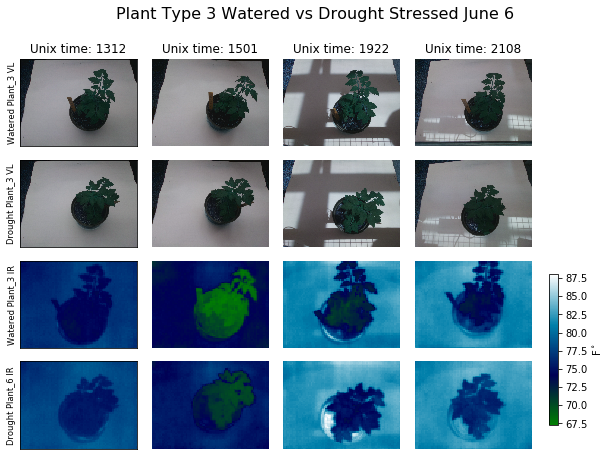

In [7]:
# Plot settings
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,7), squeeze=False)
fig.subplots_adjust(wspace=0.13, hspace=0.00, top=0.89, bottom=0.09, left=0.09, right=0.8)
plt.suptitle('Plant Type 3 Watered vs Drought Stressed June 6', fontsize=16)
fig.subplots_adjust(right=0.8)
rows = ['Watered Plant_3 VL', 'Drought Plant_3 VL',
       'Watered Plant_3 IR', 'Drought Plant_6 IR']
np.vectorize(lambda ax:ax.axis('off'))(axes)
axe_flat = axes.flatten()
for ax, r in zip(axes[:,0], rows):
    ax.axis('on')
    ax.set_ylabel(r, rotation=90, size='small')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

# Plot images
j = 0
i = 0
for f in files:
    if os.path.splitext(f)[1] == ".pgm":
        im = axe_flat[i].imshow(therm_img[j], vmin=min_temp, vmax=max_temp)
        im.set_cmap('ocean')
        i += 1
        j += 1
    elif os.path.splitext(f)[1] == ".jpg":
        img = cv.imread(f)
        if f[:6] == directory[0]:
            #date = f[7:11]
            #date = "Date: " + date[:2] + '.' + date[2:4]
            date = "Unix time: " + f[11:15]
            axe_flat[i].set_title(date)

        axe_flat[i].imshow(img)
        i += 1
    else:
        continue
cbar_ax = fig.add_axes([0.825, 0.15, 0.012, 0.30])
cbar = plt.colorbar(im, cax=cbar_ax)
cbar.set_label("F$^\circ$")

plt.show()